# Random Forest Model

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading Dataset & Data Understanding

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.shape

(918, 12)

## Look for Outliers

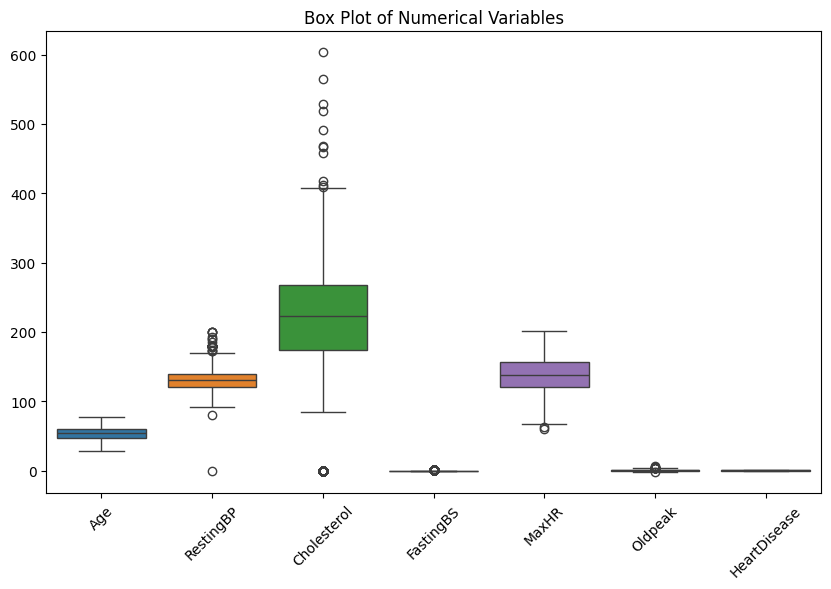

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Box Plot of Numerical Variables')
plt.xticks(rotation=45)
plt.show()

In [7]:
df.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [8]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Dropping Columns

In [10]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [11]:
df['Age'].value_counts()

Age
54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: count, dtype: int64

In [12]:
df['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

In [13]:
df['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [14]:
df['RestingBP'].value_counts()

RestingBP
120    132
130    118
140    107
110     58
150     55
      ... 
185      1
98       1
92       1
113      1
164      1
Name: count, Length: 67, dtype: int64

In [15]:
df['Cholesterol'].value_counts()

Cholesterol
0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: count, Length: 222, dtype: int64

In [16]:
df['FastingBS'].value_counts()

FastingBS
0    704
1    214
Name: count, dtype: int64

In [17]:
df['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [18]:
df['MaxHR'].value_counts()

MaxHR
150    43
140    41
120    36
130    33
160    25
       ..
63      1
83      1
60      1
78      1
202     1
Name: count, Length: 119, dtype: int64

In [19]:
df['ExerciseAngina'].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [20]:
df['Oldpeak'].value_counts()

Oldpeak
 0.0    368
 1.0     86
 2.0     76
 1.5     53
 3.0     28
 1.2     26
 0.2     22
 0.5     19
 1.4     18
 1.8     17
 2.5     16
 0.8     16
 1.6     16
 0.1     14
 0.6     14
 0.4     11
 0.3     11
 4.0      8
 0.7      7
 2.8      7
 1.9      7
 1.3      7
 2.6      7
 1.1      7
 1.7      6
 2.2      5
 0.9      4
 2.4      4
 3.6      4
 3.4      3
 4.2      2
 3.5      2
-0.5      2
 2.3      2
 3.2      2
 2.1      2
-1.0      2
-0.1      2
 5.6      1
 2.9      1
 6.2      1
 3.8      1
-1.5      1
 3.1      1
-2.0      1
 3.7      1
-0.8      1
-0.7      1
-1.1      1
-2.6      1
-0.9      1
 5.0      1
 4.4      1
Name: count, dtype: int64

In [21]:
df['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [22]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

# Dataset Splitting

In [23]:
#X = df.drop(['HeartDisease'], axis=1)
#X = df[df['Cholesterol'] < 400].drop('HeartDisease', axis=1)

#y = df['HeartDisease']

# Filter the DataFrame to include only rows where 'Cholesterol' < 400. As shown above, cholesterol with 400 and above falls out of boxplot, considered as outliers
filtered_df = df[df['Cholesterol'] < 400]

# Create the feature matrix X by dropping the 'HeartDisease' column from the filtered DataFrame
X = filtered_df.drop('HeartDisease', axis=1)

# Create the target variable y by selecting only the 'HeartDisease' column from the filtered DataFrame
y = filtered_df['HeartDisease']



# X = input features
# y = target variable

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [25]:
X_train.shape, X_test.shape

((633, 11), (272, 11))

In [26]:
y_train.shape, y_test.shape

((633,), (272,))

# Feature Engineering

In [27]:
#converting categorical data into numerical data using one-hot encoding

import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']) 

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [28]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# Random Forest model

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
# instantiate the classifier 

randomForestModel = RandomForestClassifier(random_state=0)

In [31]:
# fitting the model with training sets

randomForestModel.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [32]:
# Predict the Test set results

y_prediction = randomForestModel.predict(X_test)

In [33]:
# Determine accuracy score

from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_prediction)))

Model accuracy score: 0.8603


# Parameter Tuning

In [34]:
# tune the model with 100 n_estimators

randomForestModel_estimators = RandomForestClassifier(n_estimators=1000, random_state=0)

In [35]:
# fitting the new model with training sets

randomForestModel_estimators.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [36]:
# view each feature's importance

feature_scores = pd.Series(randomForestModel_estimators.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

ST_Slope          0.152837
ChestPainType     0.147188
Oldpeak           0.130232
MaxHR             0.115786
ExerciseAngina    0.101007
Cholesterol       0.098797
Age               0.080730
RestingBP         0.074506
Sex               0.041716
FastingBS         0.032001
RestingECG        0.025200
dtype: float64

## Visualizing Each Score of the Features

Text(0.5, 1.0, 'Visualizing Important Features')

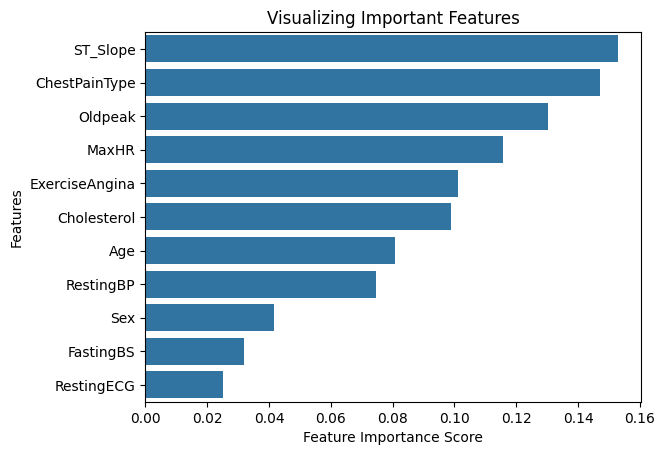

In [37]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)


# Adding labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')


# Adding title to the graph

plt.title("Visualizing Important Features")

## Select Crucial Features for Random Forest Model

In [38]:
# declare feature vector and target variable

X = df.drop(['HeartDisease', 'RestingECG', 'FastingBS'], axis=1)

y = df['HeartDisease']

In [39]:
# splitting data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [40]:
#converting categorical data into numerical data using one-hot encoding

import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Sex', 'ChestPainType', 'ExerciseAngina', 'ST_Slope']) 


X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [41]:
# instantiate the classifier with n_estimators = 100

randomForestclf = RandomForestClassifier(random_state=0)

In [42]:
# fit the model to the training set

randomForestclf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

## Predicting Heart Disease based on Testing Set 

In [43]:
# Predict on the test set results

y_pred = randomForestclf.predict(X_test)

In [44]:
# Check accuracy score 

print('Model accuracy score with RestingECG and FastingBS variables removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Model accuracy score in percentage : {0:0.2f}'. format(accuracy_score(y_test, y_pred)*100), '%')

Model accuracy score with RestingECG and FastingBS variables removed : 0.8804
Model accuracy score in percentage : 88.04 %


# Evaluation Metrics

## Confusion Matrix

In [45]:
from sklearn.metrics import confusion_matrix

confusionMatrix = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', confusionMatrix)

Confusion matrix

 [[100  12]
 [ 21 143]]


Text(45.722222222222214, 0.5, 'Actual')

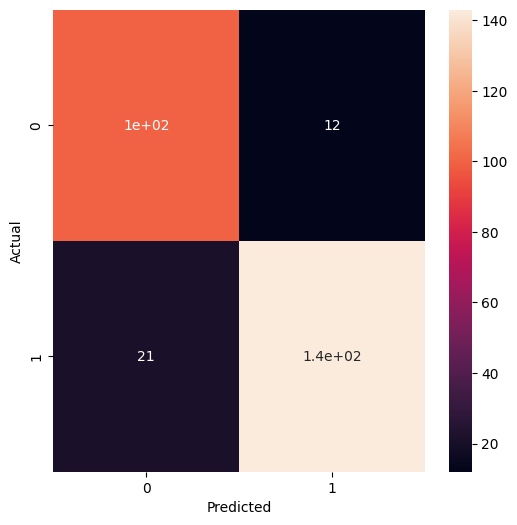

In [54]:
plt.figure(figsize = (6, 6))
sns.heatmap(confusionMatrix, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

## Classification Report

In [47]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       112
           1       0.92      0.87      0.90       164

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276



## AuC-RoC

In [56]:
from sklearn.metrics import roc_curve, auc

In [58]:
class_probabilities = randomForestclf.predict_proba(X_test)

In [59]:
aucroc_preds = class_probabilities[:, 1]

In [60]:
fpr, tpr, threshold = roc_curve(y_test, aucroc_preds)

In [61]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00892857, 0.00892857, 0.00892857, 0.00892857, 0.00892857,
       0.00892857, 0.00892857, 0.00892857, 0.00892857, 0.01785714,
       0.02678571, 0.02678571, 0.02678571, 0.02678571, 0.02678571,
       0.03571429, 0.04464286, 0.04464286, 0.05357143, 0.05357143,
       0.05357143, 0.05357143, 0.0625    , 0.07142857, 0.08035714,
       0.08035714, 0.08928571, 0.08928571, 0.08928571, 0.10714286,
       0.10714286, 0.10714286, 0.11607143, 0.125     , 0.15178571,
       0.15178571, 0.15178571, 0.15178571, 0.17857143, 0.1875    ,
       0.19642857, 0.20535714, 0.22321429, 0.23214286, 0.24107143,
       0.25892857, 0.25892857, 0.29464286, 0.3125    , 0.33035714,
       0.33928571, 0.34821429, 0.36607143, 0.375     , 0.38392857,
       0.41071429, 0.46428571, 0.47321429, 0.49107143, 0.51785714,
       0.5625    , 0.625     , 0.66071429, 0.6875    , 0.72321

In [62]:
tpr

array([0.        , 0.01829268, 0.04268293, 0.07926829, 0.1097561 ,
       0.14634146, 0.19512195, 0.24390244, 0.31707317, 0.32317073,
       0.3597561 , 0.37804878, 0.3902439 , 0.42073171, 0.44512195,
       0.47560976, 0.49390244, 0.5304878 , 0.53658537, 0.56097561,
       0.57317073, 0.57926829, 0.59146341, 0.6097561 , 0.62195122,
       0.62195122, 0.62804878, 0.66463415, 0.66463415, 0.67682927,
       0.68292683, 0.70731707, 0.73780488, 0.75      , 0.75609756,
       0.77439024, 0.79268293, 0.80487805, 0.81707317, 0.82926829,
       0.84756098, 0.87195122, 0.87195122, 0.87804878, 0.88414634,
       0.8902439 , 0.90243902, 0.90853659, 0.92073171, 0.92682927,
       0.92682927, 0.93292683, 0.93292683, 0.93292683, 0.94512195,
       0.94512195, 0.95731707, 0.95731707, 0.95731707, 0.95731707,
       0.9695122 , 0.97560976, 0.97560976, 0.97560976, 0.98170732,
       0.98170732, 0.98170732, 0.98170732, 0.98170732, 0.98170732,
       0.98170732, 0.98170732, 0.98780488, 0.99390244, 0.99390

In [64]:
roc_auc = auc(fpr, tpr)

In [65]:
roc_auc

0.9414743031358884

Text(0, 0.5, 'True Positive Rate')

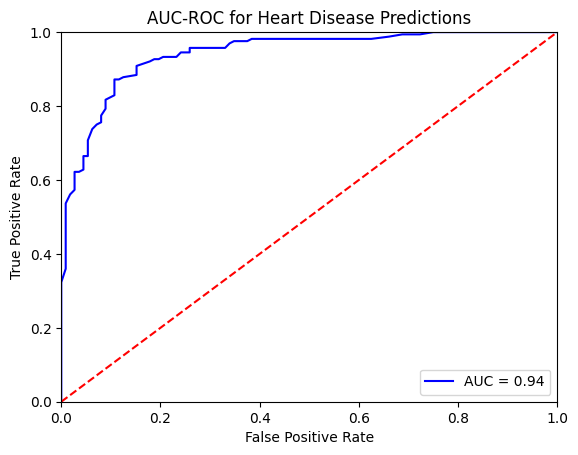

In [66]:
plt.title('AUC-ROC for Heart Disease Predictions')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

## Cross Validation

In [67]:
from sklearn.model_selection import cross_val_score

In [69]:
valid_score = cross_val_score(randomForestclf, X_train, y_train)

In [70]:
valid_score

array([0.89147287, 0.89147287, 0.8515625 , 0.8359375 , 0.828125  ])

In [71]:
valid_score_avg = np.mean(valid_score)

In [72]:
valid_score_avg

0.8597141472868216

## F1 Score

In [74]:
from sklearn.metrics import f1_score

In [77]:
f1Score = f1_score(y_test, y_pred)

In [78]:
f1Score

0.896551724137931